## Business Understanding

Financial institutions, such as banks and microfinance organizations, regularly face the challenge of lending money to customers while minimizing the risk of loan defaults. Every loan carries a certain level of risk: some customers repay on time, while others may default due to financial constraints, poor credit history, or unforeseen circumstances. Efficiently managing this risk is critical for the profitability and sustainability of the institution.
Credit scoring is all about assessing the creditworthiness of loan applicants. The goal is to predict the likelihood that a customer or a business will default on a loan so that the bank can make informed lending decisions.


## Business Problem
Wonders2015 Finance Solutions  has a pool of customers individual and Small and Medium sized Enterprises (SMEs) applying for loans.
<br>Not all applicants have the same repayment capacity.
<br>Wonders2015 Finance uses traditional loan approval process which relies on manual assessments, subjective judgment, or incomplete evaluation of a customer’s financial history. 
<br>The process is inconsistent, leading to Lending to high risk customers welcoming losses and rejecting low risk customers which leads to losing business opportunities

We need a data driven model that predicts the probability of default for each applicant either as an individual or SMEs.

## Project Objective
The main objective of this project is to develop a data-driven credit scoring system that predicts the likelihood of a customer defaulting on a loan. This model will help the bank make informed, consistent, and fair lending decisions, ultimately improving risk management and profitability.
<br>This the projects matters because of the following reasons.
1. **Risk management**- Reduce financial losses from loan defaults.

2. **Regulatory compliance** -Banks must comply with financial regulations on lending and risk.

3. **Profitability** - Proper credit scoring allows offering loans to low-risk customers while charging appropriate interest for higher risk ones.

4. **Customer fairness** - Ensures decisions are data driven, consistent, and unbiased.

## Key Deliverables:

1. Data understanding and cleaning: Understand data fields, handle missing values, and correct inconsistencies.

2. Feature engineering: Create meaningful variables (ratios, prior default info, loan characteristics).

3. Exploratory analysis: Identify factors that influence default risk.

4. Model development: Build ML models (e.g., LightGBM, Random Forest) to predict defaults.

5. Model evaluation: Use metrics like AUC-ROC, KS, and confusion matrix.

6. Business insights: Explain which factors most affect default risk.

7. Deployment-ready solution: Provide predictions or scorecards for new applicants.

##  Data Understanding and Cleaning
The data used in this project comes from a Loan Management System (LMS), where each record represents a single loan issued to an individual or SME. This section focuses on understanding the structure, quality, and key characteristics of the data before modeling.
## Description of variables in our Data


| No | Variable                        | Description                                                                                       |
|----|---------------------------------|---------------------------------------------------------------------------------------------------|
| 0  | ID                               | A unique identifier for each entry in the dataset.                                                                                                           |
| 1  | customer_id                      | Unique identifier for each customer in the dataset.                                              |
| 2  | country_id                       | Identifier or code representing the country where the customer resides or where the loan was issued.  |
| 3  | tbl_loan_id                      | Unique identifier for each loan associated with the customer.                                     |
| 4  | Total_Amount                     | The total loan amount initially disbursed to the customer.                                        |
| 5  | Total_Amount_to_Repay            | The total amount the customer is expected to repay, including principal, interest, and fees.   |
| 6  | loan_type                        | The category or type of loan.                                                                    |
| 7  | disbursement_date                | The date when the loan amount was disbursed to the customer.                                      |
| 8  | duration                         | The length of the loan term, typically expressed in days.                                         |
| 9  | lender_id                        | Unique identifier for the lender or institution that issued the loan.                             |
| 10 | New_versus_Repeat                | Indicates whether the loan is the customer's first loan ("New") or if the customer has taken loans before ("Repeat"). |
| 11 | Amount_Funded_By_Lender          | The portion of the loan funded directly by the lender.                                           |
| 12 | Lender_portion_Funded            | Percentage of the total loan amount funded by the lender.                                        |
| 13 | due_date                         | The date by which the loan repayment is due.                                                     |
| 14 | Lender_portion_to_be_repaid      | The portion of the outstanding loan that needs to be repaid to the lender.                       |
| 15 | target                           | This variable takes the value 0 or 1. 1 means the customer defaulted on the loan, 0 means the customer paid the loan. |

We begin by importing the necessary libraries and loading the dataset into the notebook
### 1. Import Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from scipy.stats import mode

# For Advanced ML Models
from imblearn.over_sampling import BorderlineSMOTE
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier

import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import GroupKFold
from sklearn.metrics import roc_auc_score
import numpy as np

### 2. Load Data

In [3]:
# Loading the train dataset
import pandas as pd
df = pd.read_csv('loan_details.csv')

test = pd.read_csv('test_data.csv')


In [4]:
test["country_id"].value_counts()

country_id
Kenya    18594
Name: count, dtype: int64

### 3. Initial Data Inspection
#### 3.1 Data Structure
In this step, we will explore the dataset to understand its structure and contents.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           68654 non-null  object 
 1   customer_id                  68654 non-null  int64  
 2   country_id                   68654 non-null  object 
 3   tbl_loan_id                  68654 non-null  int64  
 4   lender_id                    68654 non-null  int64  
 5   loan_type                    68654 non-null  object 
 6   Total_Amount                 68654 non-null  float64
 7   Total_Amount_to_Repay        68654 non-null  float64
 8   disbursement_date            68654 non-null  object 
 9   due_date                     68654 non-null  object 
 10  duration                     68654 non-null  int64  
 11  New_versus_Repeat            68654 non-null  object 
 12  Amount_Funded_By_Lender      68654 non-null  float64
 13  Lender_portion_F

In [6]:
df["target"].value_counts()

target
0    67396
1     1258
Name: count, dtype: int64

In [7]:
df.head(3)

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0


In [8]:
print(f"{df["country_id"].value_counts()}")
print("Shape",df.shape)

SyntaxError: invalid syntax (<ipython-input-8-6a5c56f2740f>, line 1)

In [9]:
# Check for null values
((df.isna().sum())/len(df))*100

ID                             0.0
customer_id                    0.0
country_id                     0.0
tbl_loan_id                    0.0
lender_id                      0.0
loan_type                      0.0
Total_Amount                   0.0
Total_Amount_to_Repay          0.0
disbursement_date              0.0
due_date                       0.0
duration                       0.0
New_versus_Repeat              0.0
Amount_Funded_By_Lender        0.0
Lender_portion_Funded          0.0
Lender_portion_to_be_repaid    0.0
target                         0.0
dtype: float64

#### 3.2 Combine Datasets
Before feature engineering,concatenate our data and test dataset provided to ensure that transformations like encoding categorical variables or scaling numeric features are consistent across both sets. This prevents issues such as missing categories or mismatched feature dimensions in the test set. Importantly, we only use the feature values during this process and never the test labels. After feature engineering, the data is split back into train and test sets for modeling.

In [10]:
# Combine datasets for consistent feature engineering
data = pd.concat([df, test]).reset_index(drop=True)

In [11]:
# Check if there is a place where amount to be repaid is zero
len(data[data["Total_Amount_to_Repay"]==0])

4

In [12]:
data.head(2)

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0.0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0.0


### 4. Data Cleaning

In [13]:
# Convert date columns to datetime
data['disbursement_date'] = pd.to_datetime(data['disbursement_date'], errors='coerce')
data['due_date'] = pd.to_datetime(data['due_date'], errors='coerce')

In [14]:
# update total amount to repay to the the lender portion to be repaid where total amount to be repaid is 0
data.loc[data['Total_Amount_to_Repay'] == 0, ['Total_Amount_to_Repay']] += data['Lender_portion_to_be_repaid']

In [16]:
 # Deal with Outliers in the Total Amount to Repay and Total Amount
q=0.9
data['Total_Amount_to_Repay'] = np.where(data['Total_Amount_to_Repay'] >= data['Total_Amount_to_Repay'].quantile(q), data['Total_Amount_to_Repay'].quantile(q),data['Total_Amount_to_Repay'])
data['Total_Amount'] = np.where(data['Total_Amount'] >= data['Total_Amount'].quantile(q), data['Total_Amount'].quantile(q),data['Total_Amount'])


### 5. Explonatory Data Analysis
#### 5.1 Distribution of defaults vs paid loans

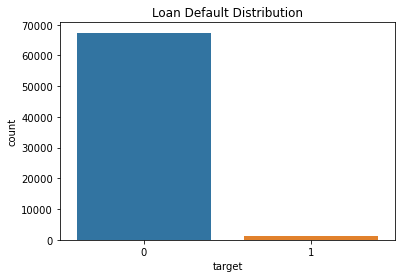

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title("Loan Default Distribution")
plt.show()


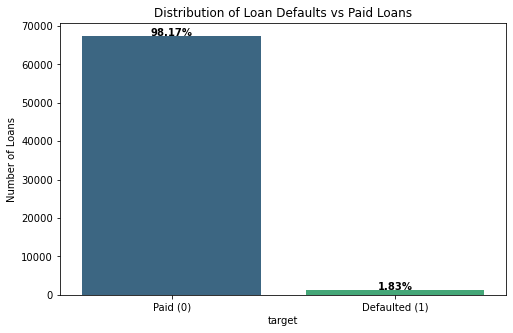

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of defaults vs paid loans
target_counts = train_df['target'].value_counts()
target_percent = train_df['target'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,5))
sns.barplot(x=target_counts.index, y=target_counts.values, palette="viridis")
for i, v in enumerate(target_counts.values):
    plt.text(i, v + 50, f"{target_percent[i]:.2f}%", ha='center', fontweight='bold')
plt.xticks([0,1], ['Paid (0)', 'Defaulted (1)'])
plt.ylabel('Number of Loans')
plt.title('Distribution of Loan Defaults vs Paid Loans')
plt.show()


From the plot and percentages, it is clear that the dataset is highly imbalanced. The majority of customers repay their loans on time (target = 0), while only a small fraction default (target = 1). This imbalance is important to note because it can affect model training since models may be biased toward predicting the majority class if special care is not taken, such as using class weights or resampling techniques.

#### 5.2 Dates and Duration

<AxesSubplot:xlabel='disbursement_date'>

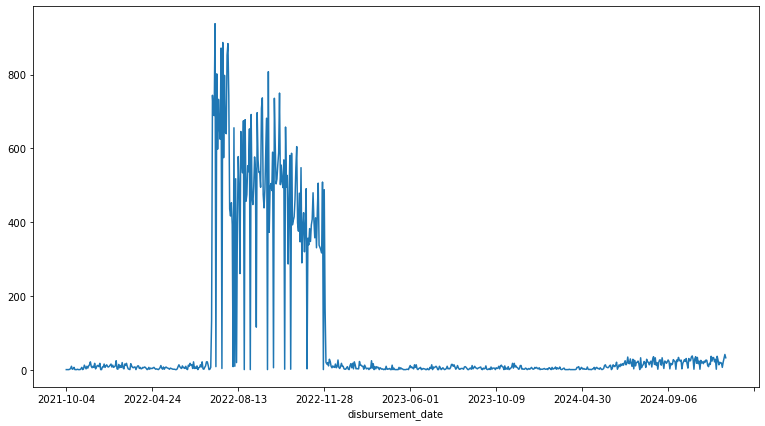

In [34]:
plt.figure(figsize=(13,7))
df['disbursement_date'].value_counts().sort_index().plot()


<AxesSubplot:xlabel='duration', ylabel='Count'>

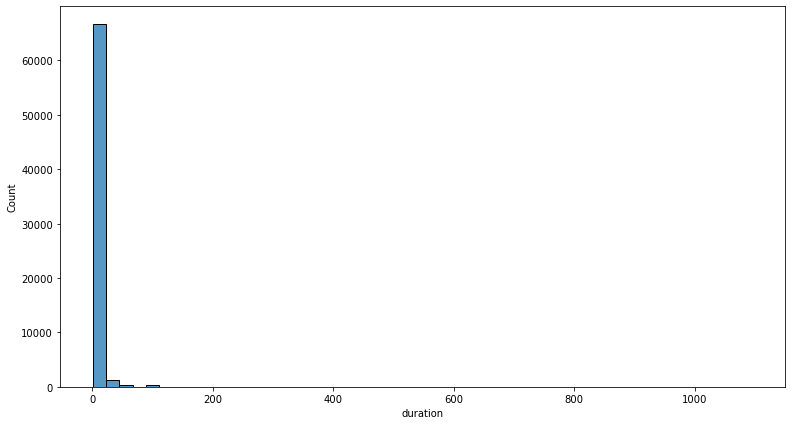

In [35]:
plt.figure(figsize=(13,7))
sns.histplot(df['duration'], bins=50)


In [45]:
# df['disbursement_month'] = df['disbursement_date'].dt.month
# sns.countplot(x='disbursement_month', hue='target', data=df)


#### 5.3 Examine Loan type vs default rate

<AxesSubplot:xlabel='loan_type', ylabel='count'>

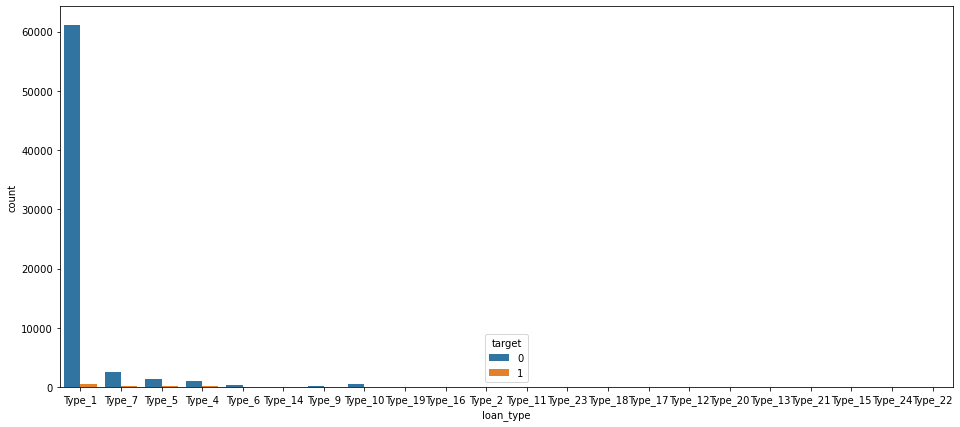

In [39]:
plt.figure(figsize=(16,7))
sns.countplot(x='loan_type', hue='target', data=df)


#### 5.4 Check for Outliers in Total Amount and Total Amount to Repay 

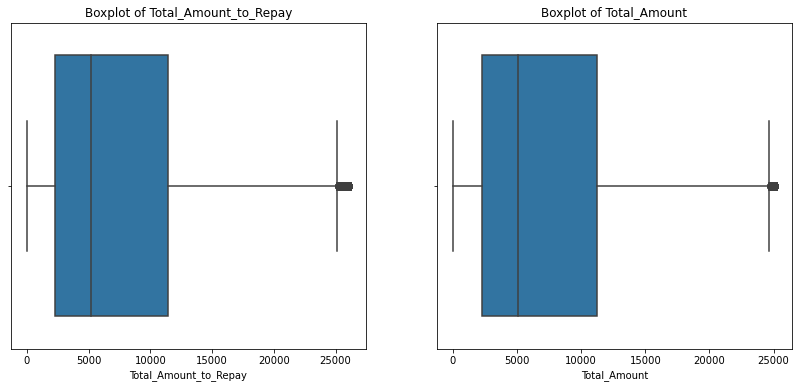

In [40]:

# Set up the figure
plt.figure(figsize=(14,6))
# Boxplot for Total_Amount_to_Repay
plt.subplot(1,2,1)
sns.boxplot(x=data['Total_Amount_to_Repay'])
plt.title('Boxplot of Total_Amount_to_Repay')
# Boxplot for Total_Amount
plt.subplot(1,2,2)
sns.boxplot(x=data['Total_Amount'])
plt.title('Boxplot of Total_Amount')
plt.show()

#### 5.5 Examine New vs Repeat loans:

<AxesSubplot:xlabel='New_versus_Repeat', ylabel='count'>

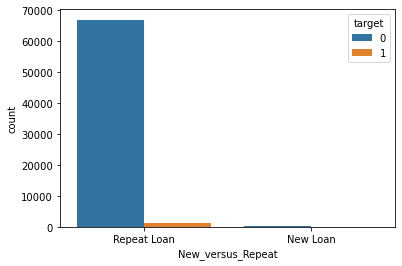

In [41]:
sns.countplot(x='New_versus_Repeat', hue='target', data=df)

#### 5.6 Check relationships between numerical features and target:

In [44]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")

### 6. Feature Engineering
#### 6.1 Compute Mean and Median
In this step below, we compute the mean and median Total Amount to Repay for each customer to capture their typical repayment behavior. By aggregating these statistics, we create new features, Mean_Total_Amount and Median_Total_Amount that provide insight into a customer’s average and typical loan burden. Merging these features back into the main dataset allows the model to use this information for better predictions, as it summarizes important historical repayment patterns at the customer level.

In [17]:
# Compute Median and Mean values by customer for the total amount to repay
aggregates = data.groupby('customer_id')['Total_Amount_to_Repay'].agg(['mean', 'median']).reset_index()
aggregates.rename(columns={'mean': 'Mean_Total_Amount', 'median': 'Median_Total_Amount'}, inplace=True)
data=data.merge(aggregates, on='customer_id', how='left')

#### 4.2 Extract Temporal Features from dates
We extract new features from disbursement_date and due_date, including month, day, year, and weekday. We also compute the loan term in days. These temporal features help the model identify patterns related to when loans are issued or due, and how loan duration might influence repayment behavior.
By this engineering we are able to understand monthly patterns for example loans disbursed at the start of the year or certain months might have different default rates, Loan duration effects ie, shorter-term loans may have higher daily repayment burdens, which could affect the likelihood of default.weekday effects, loans issued on Fridays might behave differently than those on Mondays due to business cycles and lastly combining temporal features with repayment data may reveal if certain customers consistently take loans at specific times, helping the model predict future repayment patterns.

In [18]:
import numpy as np
# Extract temporal features from dates
date_cols = ['disbursement_date', 'due_date']
for col in date_cols:
    data[col] = pd.to_datetime(data[col])
    # Extract month, day, year
    data[col+'_month'] = data[col].dt.month
    data[col+'_day'] = data[col].dt.day
    data[col+'_year'] = data[col].dt.year
    # Calculate loan term and weekday features
    data[f'loan_term_days'] = (data['due_date'] - data['disbursement_date']).dt.days
    data[f'disbursement_weekday'] = data['disbursement_date'].dt.weekday
    data[f'due_weekday'] = data['due_date'].dt.weekday


#### 4.3 Financial Ratios and Transformations

In [19]:
# Create financial ratios and transformations
data['repayment_ratio'] = data['Total_Amount_to_Repay'] / data['Total_Amount']
# The above Shows what fraction of the loan total needs to be repaid.
#It Normalizes repayment across loans of different sizes, so the model can compare customers fairly.

data['amount_due_per_day'] = (data['Total_Amount_to_Repay'] / data['duration'])
#Calculates daily repayment burden.
#Helps the model understand how “stressful” a loan is for the borrower; higher daily payments may increase default risk.

data['log_Total_Amount'] = np.log1p(data['Total_Amount'])
data['log_Total_Amount_to_Repay'] = np.log1p(data['Total_Amount_to_Repay']) 
data['log_Amount_Funded_By_Lender'] = np.log1p(data['Amount_Funded_By_Lender'])
data['log_Lender_portion_to_be_repaid'] = np.log1p(data['Lender_portion_to_be_repaid'])
#Applies log1p (log(1 + x)) to highly skewed numeric columns.
#Reduces the impact of extreme values and makes distributions closer to normal.
#Improves model stability and predictive performance.

data['amount_to_repay_greater_than_average']=data['Mean_Total_Amount'] - data['Total_Amount_to_Repay'] 
#Shows whether this specific loan repayment is above or below the customer’s historical average.
#Helps the model detect unusually large or small loans relative to a customer’s typical behavior

#### Good vs Bad Borrower Patterns in Aggregated Features - Engineered Risk Score

In [46]:
import numpy as np

# 1. Set thresholds based on your dataset
repayment_ratio_thresh = train_df['repayment_ratio'].quantile(0.75)  # top 25% risky
amount_per_day_thresh = train_df['amount_due_per_day'].quantile(0.75)  # high daily burden
amount_to_mean_thresh = 0  # loans above mean are riskier
loan_term_thresh = train_df['loan_term_days'].quantile(0.25)  # very short loans risky

# 2. Risk flags
train_df['RISK_REPAYMENT'] = np.where(train_df['repayment_ratio'] > repayment_ratio_thresh, 1, 0)
train_df['RISK_DAILY_PAYMENT'] = np.where(train_df['amount_due_per_day'] > amount_per_day_thresh, 1, 0)
train_df['RISK_AMOUNT_GREATER_THAN_MEAN'] = np.where(
    train_df['Total_Amount_to_Repay'] > train_df['Mean_Total_Amount'], 1, 0)
train_df['RISK_LOAN_TERM'] = np.where(train_df['loan_term_days'] < loan_term_thresh, 1, 0)
train_df['RISK_NEW_CUSTOMER'] = np.where(train_df['New_versus_Repeat'] == 'New', 1, 0)

# 3. Total points
train_df['RISK_POINTS'] = (
    train_df['RISK_REPAYMENT'] +
    train_df['RISK_DAILY_PAYMENT'] +
    train_df['RISK_AMOUNT_GREATER_THAN_MEAN'] +
    train_df['RISK_LOAN_TERM'] +
    train_df['RISK_NEW_CUSTOMER']
)

# 4. Risk level mapping
def map_risk(points):
    if points == 0:
        return "GOOD"
    elif points == 1 or points == 2:
        return "MEDIUM"
    elif points == 3:
        return "HIGH"
    elif points == 4:
        return "VERY HIGH"
    else:  # points == 5
        return "EXTREME"

train_df['RISK_LEVEL'] = train_df['RISK_POINTS'].apply(map_risk)

# 5. Optional: function for new data
def calculate_loan_risk(repayment_ratio, amount_per_day, total_to_repay, mean_total, loan_term_days, new_customer):
    risk_repay = 1 if repayment_ratio > repayment_ratio_thresh else 0
    risk_daily = 1 if amount_per_day > amount_per_day_thresh else 0
    risk_mean = 1 if total_to_repay > mean_total else 0
    risk_term = 1 if loan_term_days < loan_term_thresh else 0
    risk_new = 1 if new_customer == "New" else 0
    
    total_points = risk_repay + risk_daily + risk_mean + risk_term + risk_new
    
    if total_points == 0:
        return "GOOD"
    elif total_points in [1,2]:
        return "MEDIUM"
    elif total_points == 3:
        return "HIGH"
    elif total_points == 4:
        return "VERY HIGH"
    else:
        return "EXTREME"


### Data Preprocessing

In [22]:
# Handle categorical variables
cat_cols = data.select_dtypes(include='object').columns

# Label encoding for other categorical columns
le = LabelEncoder()
for col in [col for col in cat_cols if col not in ['loan_type', 'ID']]:
    data[col] = le.fit_transform(data[col])

# Split back into train and test
train_df = (data[data['ID'].isin(df['ID'].unique())]).fillna(0)
test_df = (data[data['ID'].isin(test['ID'].unique())]).fillna(0)

# Define features for modeling
features_for_modelling = [col for col in train_df.columns if col not in date_cols + ['ID', 'target', 'country_id','loan_type']]


print("The features for modelling are",features_for_modelling)

The features for modelling are ['customer_id', 'tbl_loan_id', 'lender_id', 'Total_Amount', 'Total_Amount_to_Repay', 'duration', 'New_versus_Repeat', 'Amount_Funded_By_Lender', 'Lender_portion_Funded', 'Lender_portion_to_be_repaid', 'Mean_Total_Amount', 'Median_Total_Amount', 'disbursement_date_month', 'disbursement_date_day', 'disbursement_date_year', 'loan_term_days', 'disbursement_weekday', 'due_weekday', 'due_date_month', 'due_date_day', 'due_date_year', 'repayment_ratio', 'amount_due_per_day', 'log_Total_Amount', 'log_Total_Amount_to_Repay', 'log_Amount_Funded_By_Lender', 'log_Lender_portion_to_be_repaid', 'amount_to_repay_greater_than_average']


### Model 
In the modeling phase, we use the preprocessed and feature engineered data to train our machine learning model that predict loan default. This involves selecting the features for modeling, splitting the data into train and test sets, and applying algorithms suitable for classification. We will focus on gradient boosting models XGBoost, LightGBM, and CatBoost. For each model, we perform hyperparameter tuning to optimize predictive performance. The tuned parameters control aspects like tree depth, learning rate, number of estimators, regularization, and feature sampling, ensuring that the models are both accurate and robust.

### XGBoost, lgb

In [30]:
#pip install optuna
#!pip install xgboost==1.7.6 --upgrade
#!pip install pandas==2.1.0 --upgrade



Requirement already up-to-date: xgboost==1.7.6 in c:\users\samwel\anaconda3\envs\learn-env\lib\site-packages (1.7.6)


In [1]:
import pandas as pd
import xgboost as xgb

print("Pandas version:", pd.__version__)
print("XGBoost version:", xgb.__version__)


Pandas version: 2.0.3
XGBoost version: 1.7.6


In [49]:
xgb_best_params= {'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.066, 'subsample': 0.9138294343870095, 'colsample_bytree': 0.6808646076666579, 'gamma': 0.01070807358962328, 'min_child_weight': 1}
lgb_best_params=  {'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.07587945476302646, 'num_leaves': 70, 'feature_fraction': 0.6624074561769746, 'bagging_fraction': 0.662397808134481, 'lambda_l1': 0.05808361216819946, 'lambda_l2': 0.8661761457749352, 'verbosity': -1 }
cat_best_params= {'iterations': 400, 'depth': 7, 'learning_rate': 0.09702561867586006,'verbose':False}

In [55]:
xgb_best_params= {'n_estimators': 250, 'max_depth': 7, 'learning_rate': 0.09952819042992249, 'subsample': 0.9138294343870095, 'colsample_bytree': 0.6808646076666579, 'gamma': 0.01070807358962328, 'min_child_weight': 1}
lgb_best_params=  {'n_estimators': 250, 'max_depth': 8, 'learning_rate': 0.07587945476302646, 'num_leaves': 70, 'feature_fraction': 0.6624074561769746, 'bagging_fraction': 0.662397808134481, 'lambda_l1': 0.05808361216819946, 'lambda_l2': 0.8661761457749352,'verbosity':-1}
cat_best_params= {'iterations': 500, 'depth': 7, 'learning_rate': 0.09702561867586006,'verbose':False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GroupKFold
from xgboost import XGBClassifier
import numpy as np
X=train_df[features_for_modelling]
y=train_df['target']
groups = train_df['customer_id'] 

# Define the parameter grid
xgb_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.075, 0.1, 0.15],
    'subsample': [0.6, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.01, 0.1, 0.5, 1],
    'min_child_weight': [1, 2, 3, 5]
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

cv = GroupKFold(n_splits=4)

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_grid,
    n_iter=20,  # number of random combinations
    scoring='roc_auc',
    cv=cv.split(X, y, groups=groups),
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search_xgb.fit(X, y)
print("Best XGB params:", random_search_xgb.best_params_)
print("Best ROC-AUC:", random_search_xgb.best_score_)


In [56]:
from sklearn.model_selection import GroupKFold
from sklearn.metrics import (
    classification_report,
    f1_score,
    roc_auc_score,
    average_precision_score
)

seed = 42
X = train_df[features_for_modelling]
y = train_df['target']
groups = train_df['customer_id']  # GROUPING by customer

# GroupKFold ensures no customer appears in both train & validation
cv = GroupKFold(n_splits=4)

# Metrics storage
f1_scores = []
roc_auc_scores = []
pr_auc_scores = []

for fold, (train_idx, valid_idx) in enumerate(cv.split(X, y, groups), 1):

    X_fold_train = X.iloc[train_idx]
    X_fold_valid = X.iloc[valid_idx]
    y_fold_train = y.iloc[train_idx]
    y_fold_valid = y.iloc[valid_idx]

    # Calculate scale_pos_weight to handle imbalance
    scale_pos_weight = (
        len(y_fold_train[y_fold_train == 0]) / len(y_fold_train[y_fold_train == 1])
    )

    # Models (silent)
    model1 = xgb.XGBClassifier(
        **xgb_best_params,
        scale_pos_weight=scale_pos_weight,
        random_state=seed,
        verbosity=0
    )

    model2 = LGBMClassifier(
        **lgb_best_params,
        scale_pos_weight=scale_pos_weight,
        random_state=seed,
        verbose=-1
    )

    model3 = CatBoostClassifier(
        **cat_best_params,
        scale_pos_weight=scale_pos_weight,
        random_state=seed

    )

    # Fit models
    model1.fit(X_fold_train, y_fold_train)
    model2.fit(X_fold_train, y_fold_train)
    model3.fit(X_fold_train, y_fold_train)

    # --- PROBABILITIES ---
    proba_1 = model1.predict_proba(X_fold_valid)[:, 1]
    proba_2 = model2.predict_proba(X_fold_valid)[:, 1]
    proba_3 = model3.predict_proba(X_fold_valid)[:, 1]

    # Soft voting
    avg_proba = (proba_1 + proba_2 + proba_3) / 3
    preds = (avg_proba >= 0.5).astype(int)

    # Metrics
    f1 = f1_score(y_fold_valid, preds)
    roc_auc = roc_auc_score(y_fold_valid, avg_proba)
    pr_auc = average_precision_score(y_fold_valid, avg_proba)

    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    pr_auc_scores.append(pr_auc)

    print(f"\nFold {fold}")
    print(classification_report(y_fold_valid, preds))
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"PR-AUC:  {pr_auc:.4f}")
    print("-" * 50)

# --- SUMMARY ---
print("\n===== GROUP CV SUMMARY =====")
print(f"Mean F1 Score:  {np.mean(f1_scores):.4f}")
print(f"Mean ROC-AUC:   {np.mean(roc_auc_scores):.4f}")
print(f"Mean PR-AUC:    {np.mean(pr_auc_scores):.4f}")



Fold 1
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     16894
         1.0       0.66      0.83      0.74       270

    accuracy                           0.99     17164
   macro avg       0.83      0.91      0.87     17164
weighted avg       0.99      0.99      0.99     17164

F1 Score: 0.7368
ROC-AUC: 0.9924
PR-AUC:  0.8568
--------------------------------------------------

Fold 2
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     16839
         1.0       0.74      0.78      0.76       325

    accuracy                           0.99     17164
   macro avg       0.87      0.89      0.88     17164
weighted avg       0.99      0.99      0.99     17164

F1 Score: 0.7590
ROC-AUC: 0.9949
PR-AUC:  0.8561
--------------------------------------------------

Fold 3
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     16824
         1.0 

#### Interpretation
F1 score is our primary metric since our data is highly imbalanced, few defaults.
The model performs very well in identifying customers who default on loans. While overall accuracy is extremely high 99%, this is largely due to the dataset imbalance. The mean F1 score of 0.75 and PR-AUC of 0.8591 indicate that the model balances correctly identifying defaulters while minimizing false positives. ROC-AUC of 0.993 confirms excellent separation between the defaulter and non-defaulter classes. These metrics suggest that the model is reliable for risk assessment and Financial institutions can count on it as a reliable source of truth

| Fold        | Default Precision | Default Recall | Default F1 | ROC-AUC    | PR-AUC     |
| ----------- | ----------------- | -------------- | ---------- | ---------- | ---------- |
| 1           | 0.66              | 0.83           | 0.74       | 0.9924     | 0.8568     |
| 2           | 0.74              | 0.78           | 0.76       | 0.9949     | 0.8561     |
| 3           | 0.72              | 0.80           | 0.75       | 0.9905     | 0.8452     |
| 4           | 0.71              | 0.81           | 0.75       | 0.9942     | 0.8783     |
| **Average** | **0.71**          | **0.81**       | **0.75**   | **0.9930** | **0.8591** |


In [57]:
X, y = train_df[features_for_modelling], train_df['target']
groups = train_df['customer_id']

cv = GroupKFold(n_splits=4)
seed = 42

# Store ensemble probabilities for test set
test_proba_ensemble = np.zeros(len(test_df))

for fold, (train_idx, valid_idx) in enumerate(cv.split(X, y, groups), 1):

    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

    # Handle class imbalance with scale_pos_weight
    scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

    # Models (silent)
    model1 = xgb.XGBClassifier(**xgb_best_params, scale_pos_weight=scale_pos_weight, random_state=seed, verbosity=0)
    model2 = LGBMClassifier(**lgb_best_params, scale_pos_weight=scale_pos_weight, random_state=seed, verbose=-1)
    model3 = CatBoostClassifier(**cat_best_params, scale_pos_weight=scale_pos_weight, random_state=seed)

    # Train models
    model1.fit(X_train, y_train)
    model2.fit(X_train, y_train)
    model3.fit(X_train, y_train)

    # --- Test predictions per fold (probabilities) ---
    proba_1 = model1.predict_proba(test_df[features_for_modelling])[:, 1]
    proba_2 = model2.predict_proba(test_df[features_for_modelling])[:, 1]
    proba_3 = model3.predict_proba(test_df[features_for_modelling])[:, 1]

    # Average probabilities for ensemble
    test_proba_ensemble += (proba_1 + proba_2 + proba_3) / 3

# Average over folds
test_proba_ensemble /= cv.get_n_splits()

# Final binary predictions with threshold 0.5
test_preds = (test_proba_ensemble >= 0.5).astype(int)


### Deployment

In [58]:
import joblib

# Train final model on full training data
scale_pos_weight = len(y[y == 0]) / len(y[y == 1])

final_xgb = xgb.XGBClassifier(
    **xgb_best_params,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    verbosity=0
)

final_xgb.fit(X, y)

joblib.dump(final_xgb, "my_xgb_model.pkl")
print("Model saved successfully.")


Model saved successfully.


In [59]:
joblib.dump(features_for_modelling, "model_features.pkl")


['model_features.pkl']